In [210]:
# -요청사항-
# 저희 스포츠 센터에는 '종일회원', 낮에만 사용가능한 '주간회원', 밤에만 사용가능한 '야간회원' 3종류의 회원 구분이 있습니다. 또, 일반적으로 '입회비'가 들지만, 
# 비정기적으로 '할인행사'로 신규회원을 늘리고 있습니다. 탈퇴하려면 '월말까지 신청'하면 그 다음 달 말에 탈퇴가 됩니다.

# 데이터 분석

목적 : 스포츠센터에서 받은 데이터를 전처리 - 시각화- 분석하여 다양한 정보들을 보기 쉬운 자료를 만들어 전략적으로 분석 후 고객에게 앞으로 나아가야할 방향성을 제시하고자 한다.

1. user_log 데이터를 통해 얻을 수 있는 정보

    1-1. 1년 간 헬스장 이용 수

    1-2. 성별에 따른 스포츠센터 방문 수 차이

2. customer_master 데이터를 통해 얻을 수 있는 정보

    2-1. 2019년 3월 말 시점 실질적 회원수

    2-2. 성별 회원 분석

    2-3. 월별 탈퇴 회원 수를 분석

    2-4. 월별 회원가입 수를 분석

3. class_master 데이터를 통해 얻을 수 있는 정보
 
    3-1. 2번과 연계할 자료(class : 종일, 주간, 야간)
    
4. campaign_master 데이터를 통해 얻을 수 있는 정보

    4-1. 2번과 연계할 자료 (혜택 : 일반, 50%, Free)

5. 시각화 - 전처리한 데이터(월, 혜택, 시간대, 성별, 탈퇴, 방문, class 등)을 조합하여 가시화

6. 결론 - 전략적 분석 컨설팅

In [211]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
user_log = pd.read_csv('data3/use_log.csv')
customer_master = pd.read_csv('data3/customer_master.csv')
class_master = pd.read_csv('data3/class_master.csv')
campaign_master = pd.read_csv('data3/campaign_master.csv')

### 1. user_log 데이터를 통해 얻을 수 있는 정보

1-1. 1년 간 헬스장 이용 수

1-2. customer_master를 사용하여 성별에 따른 이용 차이

In [212]:
user_log.head(1) # 2018년 4월 부터 2019년 3월 까지 1년 동안의 유저의 활동 로그

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01


In [213]:
# 1년 간 헬스장 방문수 합계 = 197428명
user_log.count()

log_id         197428
customer_id    197428
usedate        197428
dtype: int64

### 2. customer_master 데이터를 통해 얻을 수 있는 정보

2-1. 'end_date' 의 null 값 = 2842, 2019년 3월 말 시점에 1,350명이 탈퇴하고 실질적 회원수는 2,842명

2-2. 성별 차이

2-3. 'end_date' 를 통해 월별 탈퇴 회원 수를 분석 가능

2-4. 'start_date' 를 통해 월별 회원가입 수를 분석 가능

In [214]:
# 2019년 3월 말 시점의 회원 데이터
customer_master.head(1)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0


In [215]:
#2-1
# 현재 스포츠센터의 회원수 = 2,842명
# 'end_date' columns에 정보가 null 인 것은 탈퇴하지 않은 상태라고 볼 수 있음
# 결측치가 'end_date' columns 에만 존재하는 것을 확인 가능
customer_master.isnull().sum()

customer_id       0
name              0
class             0
gender            0
start_date        0
end_date       2842
campaign_id       0
is_deleted        0
dtype: int64

In [216]:
# 2-2
# null 값을 '회원'로 치환하여 표기
customer_master_1 = customer_master.fillna('회원')
customer_master_1[(customer_master_1['gender']=='F') & (customer_master_1['end_date'] == '회원')].count()
# 현재 여성회원의 수 = 1,352명
# 현재 남성회원의 수 = 1,490명

customer_id    1352
name           1352
class          1352
gender         1352
start_date     1352
end_date       1352
campaign_id    1352
is_deleted     1352
dtype: int64

In [217]:
# customer_master와 user_log를 사용하여 성별에 따른 이용 차이
user_master = customer_master.merge(user_log, on = 'customer_id', how = 'outer')
user_master[(user_master['gender']=='F')].loc[:,'customer_id'].count() #여성 고객 방문 수  93,063명 
user_master[(user_master['gender']=='M')].loc[:,'customer_id'].count() #남성 고객 방문 수 104,365명
# 1년간 약 11,000명의 차이가 나타나는 것을 볼 수 있음 이를 통해 여성 고객을 위한 사업, 이벤트를 추진할 필요가 있다고 생각됨

104365

In [218]:
# 2-3. 'end_date' 를 통해 월별 탈퇴 회원 수를 분석 가능
customer_master['end_date'] = pd.to_datetime(customer_master['end_date'])
customer_master['end_month'] = customer_master['end_date'].dt.strftime('%Y%m')
customer_master.dropna().head(1)
# 년월을 나타내는 컬럼 생성


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,end_month
708,TS511179,XXXXXX,C01,F,2016-05-01 00:00:00,2018-04-30,CA1,1,201804


In [219]:
customer_master

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,end_month
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,NaN
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,NaN
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,NaN
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,NaN
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaT,CA1,0,NaN
...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaT,CA1,0,NaN
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaT,CA1,0,NaN
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaT,CA1,0,NaN
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaT,CA1,0,NaN


In [220]:
user_end_month = customer_master.groupby('end_month').count()[['customer_id']]
user_end_month.rename(columns= {'customer_id' : '월별 탈퇴회원 수'}, inplace= True)
user_end_month
# groupby 를 통해 월별 고객의 방문 수를 나타내는 데이터프레임 생성

,월별 탈퇴회원 수
end_month,
201804,121
201805,125
201806,106
201807,102
201808,113
201809,104
201810,90
201811,89
201812,111


In [221]:
# 2-4. 'start_date' 를 통해 월별 회원가입 수를 분석 가능
customer_master['start_date'] = pd.to_datetime(customer_master['start_date'])
customer_master['start_month'] = customer_master['start_date'].dt.strftime('%Y%m')
user_start_month = customer_master.groupby('start_month').count()[['customer_id']]
user_start_month.rename(columns= {'customer_id' : '월별 회원가입 수'}, inplace= True)
user_start_month.tail(12)

,월별 회원가입 수
start_month,
201804,175
201805,193
201806,166
201807,135
201808,102
201809,88
201810,66
201811,65
201812,157


### 3. class_master 데이터를 통해 얻을 수 있는 정보
3-1. 'class' columns 를 통해 2번의 정보들을 3가지 방향(종일, 주간, 야간)으로 분석 가능

In [222]:
class_master # 회원 구분 데이터(가격 = 종일 > 주간 > 야간)

,class,class_name,price
0,C01,0_종일,10500
1,C02,1_주간,7500
2,C03,2_야간,6000


In [223]:
user_master_class = customer_master.merge(class_master, on = 'class', how = 'outer')

In [224]:
# 종일, 주간, 야간 별 회원 수
user_master_class = user_master_class.groupby('class_name')['customer_id'].count()
user_master_class

class_name
0_종일    2045
1_주간    1019
2_야간    1128
Name: customer_id, dtype: int64

### 4. campaign_master 데이터를 통해 얻을 수 있는 정보
4-1. 'campaign_id' columns 를 통해 2번의 정보들을 3가지 방향(일반, 50%, Free)으로 분석 가능

In [225]:
campaign_master # 행사 구분 데이터(입회비 유무 등)

,campaign_id,campaign_name
0,CA1,2_일반
1,CA2,0_입회비반액할인
2,CA3,1_입회비무료


In [226]:
user_master_customer = customer_master.merge(campaign_master, on = 'campaign_id', how = 'outer')

In [227]:
# 할인 혜택 별 회원 수
user_master_customer = user_master_customer.groupby('campaign_name')['customer_id'].count()
user_master_customer

campaign_name
0_입회비반액할인     650
1_입회비무료       492
2_일반         3050
Name: customer_id, dtype: int64

5. 시각화 - 전처리한 데이터 목록 =  월, 혜택, 시간대, 성별, 탈퇴, 방문, 클래스 등

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '201804'),
  Text(1, 0, '201805'),
  Text(2, 0, '201806'),
  Text(3, 0, '201807'),
  Text(4, 0, '201808'),
  Text(5, 0, '201809'),
  Text(6, 0, '201810'),
  Text(7, 0, '201811'),
  Text(8, 0, '201812'),
  Text(9, 0, '201901'),
  Text(10, 0, '201902'),
  Text(11, 0, '201903')])

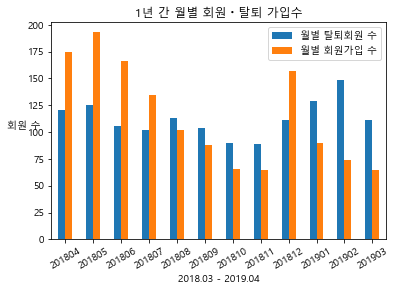

In [228]:
# 1년 간 월별 회원ㆍ탈퇴가입수를 비교하는 그래프를 통해 계절, 국내 이슈 등 고객 유치에 영향을 주는 원인을 분석하여 개선점 및 방향성을 제시하고자 한다.
user_startend_month = pd.concat([user_end_month,user_start_month],axis=1)
user_startend_month = user_startend_month.dropna()
user_startend_month.plot(kind='bar')
plt.title("1년 간 월별 회원ㆍ탈퇴 가입수")
plt.xlabel("2018.03 - 2019.04")
plt.ylabel("회원 수", rotation= 0)
plt.xticks(rotation = 30)
# 그래프를 통해 2018년 상반기에는 회원 가입자의 수가 1/3가량 많았지만 8월부터 탈퇴회원의 수가 늘어나더니 12월을 제외한 모든 월에 1/2 가까이 차이나는 것을 볼 수 있다.
# 이를 통해 계절의 절대적인 영향보다는 스포츠센터에 고객 유치에 영향을 주는 다른 원인이 있었다는 것을 알 수 있다.
# 특히 12월만 회원가입 수가 회원탈퇴 수보다 많았던 것은 할인 행사 등 이벤트성의 영향으로 보인다.
# 이에 바람직한 방향성은 빠르게 변화하는 현 시점에서 SNS 등 인터넷 문화의 영향을 많이 받는 스포츠센터가 발빠르게 변화에 맞춰가는 것이라고 볼 수 있다.

Text(0, 0.5, '회원 수')

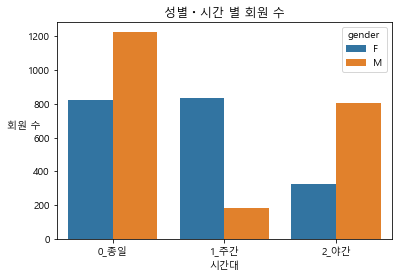

In [229]:
# bar plot을 사용해 성별,class,회원수를 비교해 지역의 특성을 알아내어 이에 맞춤형 혜택 및 특성화 이벤트를 추천해준다
customer_master = customer_master.merge(class_master, on = 'class', how = 'outer')
customer_master_genderclass = customer_master.groupby(by=['class_name', 'gender'],as_index=False).count()
sns.barplot(data=customer_master_genderclass,x="class_name",y="customer_id", hue="gender")
plt.title("성별ㆍ시간 별 회원 수")
plt.xlabel("시간대")
plt.ylabel("회원 수", rotation= 0)

# 아래 그래프를 보면 종일ㆍ야간 회원권은 남성이, 주간 회원권은 여성이 앞도적으로 많은 것을 볼 수 있다.
# 이를 통해 스포츠센터가 위치한 지역의 특성은 신혼부부, 전업주부가 많은 신도시 혹은 교육이 특화된 지역일 가능성이 높다.
# 지역에 맞는 혜택과 이벤트를 적절히 사용한다면 더욱 활발한 고객 유치가 가능할 것으로 생각된다.

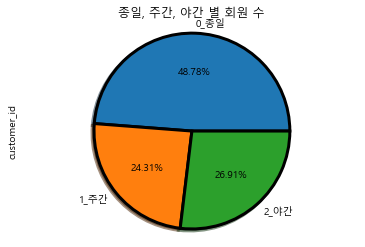

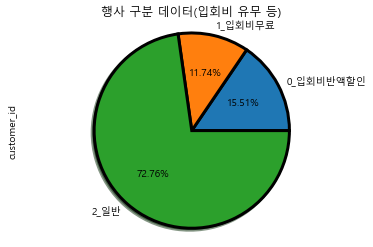

In [230]:
# 위에서 지역 특성을 분석했으니 그에 맞는 맞춤 혜택을 제공하기전, 지금까지 시행되고 있던 행사에 관해 분석하고자 한다.
w = {"edgecolor": "black", "linewidth":3, "width":1}
user_master_class.plot.pie( autopct='%.2f%%', shadow=True, wedgeprops=w)
plt.title("종일, 주간, 야간 별 회원 수")
plt.axis('equal')
plt.show()
user_master_customer.plot.pie(autopct='%.2f%%', shadow=True, wedgeprops=w)
plt.title("행사 구분 데이터(입회비 유무 등)")
plt.axis('equal')
plt.show()

# 첫 번째 파이형 그래프 봤을 때 주간, 야간보다 종일 회원권의 수가 절반을 차지하기 때문에 위에서 예측했던 지역의 특성에 대해 신빙성을 더 해준다고 생각된다. 
# 두 번째 파이형 그래프를 통해 행사를 통해 들어온 회원보다 일반적으로 들어온 회원의 수가 3/4을 차지하는 것을 볼 수 있다. 
# 이는 '1년 간 월별 회원ㆍ탈퇴 가입수' 를 분석했을 때 회원가입수보다 회원탈퇴수가 점점 많아지고 있는 것에 어느 정도 영향을 주고 있다고 생각된다.

Text(0, 0.5, '방문자 수')

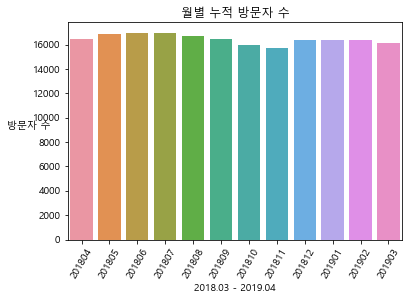

In [231]:
# 1년간 월별 누적 방문 수를 통해 스포츠센터의 전반적인 고객의 반동성을 확인한다.

customer_master = customer_master.merge(user_log, on = 'customer_id', how = 'outer')
customer_master['usedate'] = pd.to_datetime(customer_master['usedate'])
customer_master['use_month'] = customer_master['usedate'].dt.strftime('%Y%m')
customer_master_usemonth = customer_master.groupby(by=['use_month'],as_index=False).count()
sns.barplot(data=customer_master_usemonth,x="use_month",y="customer_id")
plt.title("월별 누적 방문자 수")
plt.xlabel("2018.03 - 2019.04")
plt.xticks(rotation = 60)
plt.ylabel("방문자 수", rotation= 0)

# 회원가입수에 비해 회원탈퇴수가 더 증가하고 있는 상황에서 월별 방문자 수의 변화가 거의 없는 것으로 봤을 때 기존 회원들의 방문수가 점점 증가하고 있다는 것을 알 수 있다.

6. 결론 
    
    6-1 데이터 분석을 통해 지역이 가지고 있는 특성을 알 수 있었다.

    6-2 혜택, 행사, 이벤트 등 신규 회원을 위한 전략이 부족하다고 생각된다.

    6-3 기존 회원들의 방문수는 큰 변화는 없었다.

    6-4 스포츠센터가 위치한 지역의 특성과 발빠르게 변해가는 시대상에 맞춰 신규 회원을 위한 맞춤형 서비스를 제공하는 것이 1순위이다.

    6-5 이러한 방향성에 맞추어 신규 회원을 받고 가장 자신 있는 기존 회원에 대한 유치를 결합한다면 인접한, 다른 스포츠 센터보다 고객 유치를 선점할 수 있을 것이다.